In [1]:
## now we have clean data set ready to  train models

In [1]:
## importing the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("uber_clean_datasets.csv")
df.head()

,fare_amount,hour,day,month,year,dayofweek,distance_km
0,7.5,19,7,5,2015,3,1.683323
1,7.7,20,17,7,2009,4,2.457590
2,12.9,21,24,8,2009,0,5.036377
3,5.3,8,26,6,2009,4,1.661683
4,16.0,17,28,8,2014,3,4.475450


In [3]:
df.shape

(19760, 7)

In [26]:
y = df[["fare_amount"]]
x = df.drop("fare_amount" , axis= 1)

In [27]:
x

,hour,day,month,year,dayofweek,distance_km
0,19,7,5,2015,3,1.683323
1,20,17,7,2009,4,2.457590
2,21,24,8,2009,0,5.036377
3,8,26,6,2009,4,1.661683
4,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...
19755,8,13,4,2010,1,0.816129
19756,20,18,8,2010,2,0.779746
19757,19,16,4,2009,3,2.773138
19758,21,21,7,2014,0,0.925066


In [28]:
y

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
19755,3.7
19756,3.7
19757,11.3
19758,5.5


In [29]:
## importing train test split to seprate the traing and test data 
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=42)

In [31]:
x_train.shape, y_train.shape

((13832, 6), (13832, 1))

In [32]:
x_test.shape,y_test.shape

((5928, 6), (5928, 1))

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Re-wrapping the scaled data into a DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

## Linear regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
y_pred=reg.predict(x_test_scaled)

Mean absolute error 1.385239932320791
R2 Score 0.6668092735575637


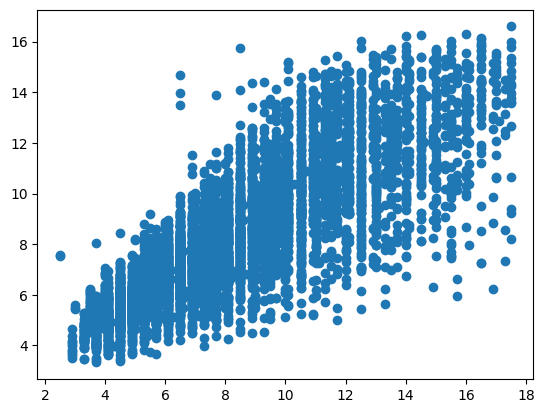

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [38]:
reg.score(x_test_scaled , y_test)

0.6668092735575637

In [39]:
x_test_scaled.columns

Index(['hour', 'day', 'month', 'year', 'dayofweek', 'distance_km'], dtype='object')

In [40]:
pred = reg.predict(scaler.transform([[19,	7	,5	,2015,	3	,168]]))
print('total fare is :$',pred)

total fare is :$ [[349.40598627]]


In [ ]:
## ridge regression 

In [ ]:
## lasso regression

In [47]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso =lasso.predict(x_test_scaled)

In [52]:
y_pred_lasso

array([7.16381108, 8.34963581, 7.17929454, ..., 8.01671365, 6.52291775,
       9.25192672], shape=(5928,))

Mean absolute error 1.7253000146005606
R2 Score of lasso 0.5307429394436961


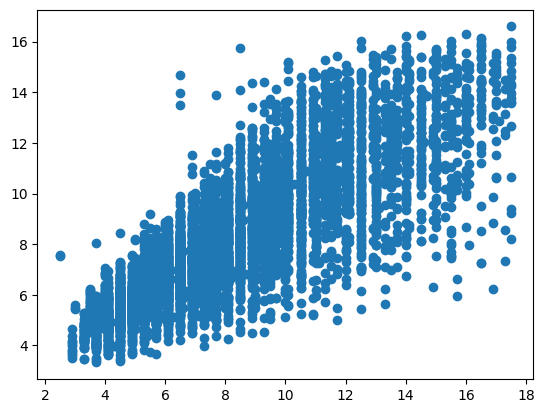

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("Mean absolute error", mae)
print("R2 Score of lasso", score)
plt.scatter(y_test,y_pred)

In [55]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [57]:
lassocv.alpha_

np.float64(0.0031206561878830037)

In [58]:
lassocv.alphas_

array([2.53126045, 2.36066196, 2.20156125, 2.05318339, 1.9148057 ,
       1.7857542 , 1.66540035, 1.55315794, 1.44848029, 1.35085757,
       1.25981429, 1.17490702, 1.09572222, 1.02187421, 0.95300331,
       0.88877408, 0.82887368, 0.77301037, 0.72091205, 0.67232499,
       0.62701254, 0.58475399, 0.54534353, 0.5085892 , 0.47431199,
       0.44234495, 0.41253238, 0.38472908, 0.35879963, 0.33461773,
       0.31206562, 0.29103344, 0.27141876, 0.25312604, 0.2360662 ,
       0.22015612, 0.20531834, 0.19148057, 0.17857542, 0.16654003,
       0.15531579, 0.14484803, 0.13508576, 0.12598143, 0.1174907 ,
       0.10957222, 0.10218742, 0.09530033, 0.08887741, 0.08288737,
       0.07730104, 0.07209121, 0.0672325 , 0.06270125, 0.0584754 ,
       0.05453435, 0.05085892, 0.0474312 , 0.0442345 , 0.04125324,
       0.03847291, 0.03587996, 0.03346177, 0.03120656, 0.02910334,
       0.02714188, 0.0253126 , 0.02360662, 0.02201561, 0.02053183,
       0.01914806, 0.01785754, 0.016654  , 0.01553158, 0.01448

In [58]:
lassocv.alphas_

array([2.53126045, 2.36066196, 2.20156125, 2.05318339, 1.9148057 ,
       1.7857542 , 1.66540035, 1.55315794, 1.44848029, 1.35085757,
       1.25981429, 1.17490702, 1.09572222, 1.02187421, 0.95300331,
       0.88877408, 0.82887368, 0.77301037, 0.72091205, 0.67232499,
       0.62701254, 0.58475399, 0.54534353, 0.5085892 , 0.47431199,
       0.44234495, 0.41253238, 0.38472908, 0.35879963, 0.33461773,
       0.31206562, 0.29103344, 0.27141876, 0.25312604, 0.2360662 ,
       0.22015612, 0.20531834, 0.19148057, 0.17857542, 0.16654003,
       0.15531579, 0.14484803, 0.13508576, 0.12598143, 0.1174907 ,
       0.10957222, 0.10218742, 0.09530033, 0.08887741, 0.08288737,
       0.07730104, 0.07209121, 0.0672325 , 0.06270125, 0.0584754 ,
       0.05453435, 0.05085892, 0.0474312 , 0.0442345 , 0.04125324,
       0.03847291, 0.03587996, 0.03346177, 0.03120656, 0.02910334,
       0.02714188, 0.0253126 , 0.02360662, 0.02201561, 0.02053183,
       0.01914806, 0.01785754, 0.016654  , 0.01553158, 0.01448

Mean absolute error 1.3852428119502147
R2 Score 0.6668272714764072


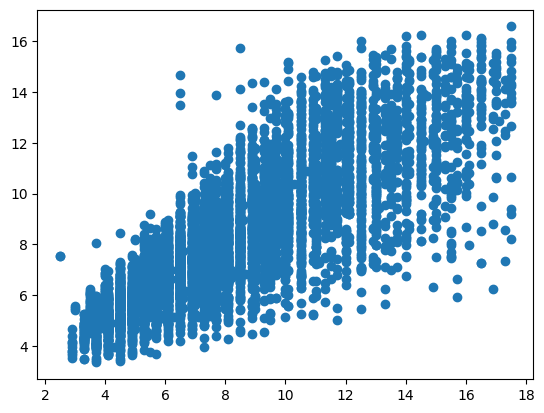

In [60]:
y_pred_lassocv =lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred_lassocv)
mae=mean_absolute_error(y_test,y_pred_lassocv)
score=r2_score(y_test,y_pred_lassocv)
print("Mean absolute error", mae)
print("R2 Score", score)


In [ ]:
##  ridge regression 

Mean absolute error 1.3852507820769266
R2 Score 0.6668096472058229


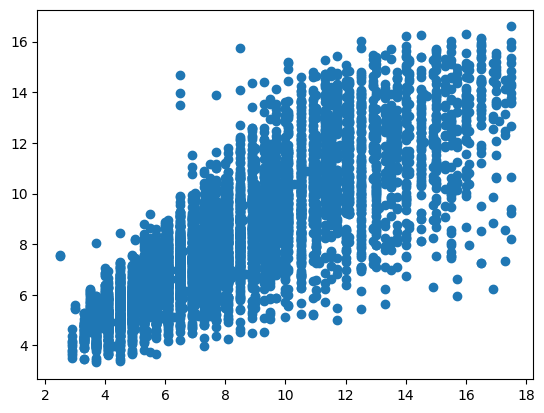

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_rid=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_rid)
score=r2_score(y_test,y_pred_rid)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred_rid)

In [ ]:
## elisticnet regression 

Mean absolute error 1.7962393304660662
R2 Score 0.49652861705945883


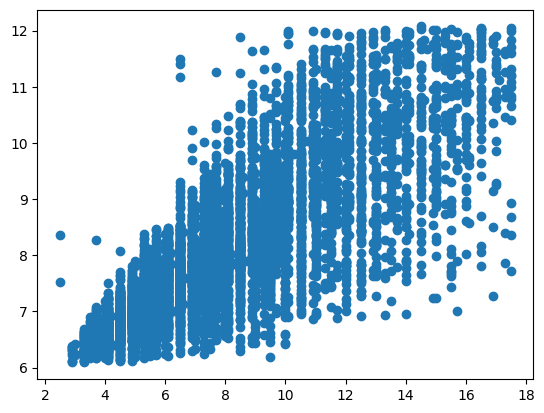

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred_el=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_el)
score=r2_score(y_test,y_pred_el)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred_el)

Mean absolute error 1.3856364754976396
R2 Score 0.6668286935607552


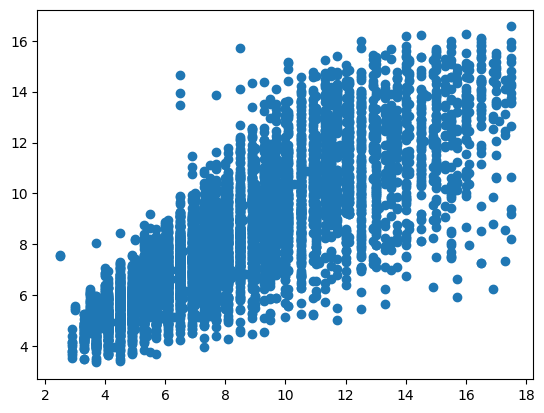

In [65]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred_elcv=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred_elcv)
mae=mean_absolute_error(y_test,y_pred_elcv)
score=r2_score(y_test,y_pred_elcv)
print("Mean absolute error", mae)
print("R2 Score", score)

In [ ]:
## pipeline of model

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.1))
    ]),
    
    "ElasticNet Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNet(alpha=0.1, l1_ratio=0.5))
    ])
}


In [68]:
results = []

for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    
    y_pred = pipeline.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])


In [69]:
results_df = pd.DataFrame(
    results, 
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

results_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.385240,1.857407,0.666809
1,Ridge Regression,1.385251,1.857406,0.666810
2,Lasso Regression,1.396508,1.867799,0.663070
3,ElasticNet Regression,1.402802,1.867988,0.663002


In [70]:
best_model = results_df.sort_values(by="R2 Score", ascending=False)
best_model


,Model,MAE,RMSE,R2 Score
1,Ridge Regression,1.385251,1.857406,0.666810
0,Linear Regression,1.385240,1.857407,0.666809
2,Lasso Regression,1.396508,1.867799,0.663070
3,ElasticNet Regression,1.402802,1.867988,0.663002


In [84]:
final_pipeline = pipelines[best_model.iloc[0]["Model"]]


In [85]:
final_pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
